<a href="https://colab.research.google.com/github/Bkoder/VIMS-IAARC/blob/main/Json_to_Masks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycocotools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!unzip '/content/drive/MyDrive/bigvision/Document_scanning_images_resized_640.zip'

Archive:  /content/drive/MyDrive/bigvision/Document_scanning_images_resized_640.zip
   creating: all_images_resized_640/
  inflating: all_images_resized_640/M_Img_Android_D10_L2_r35_a-10_b-5.jpg  
  inflating: all_images_resized_640/M_Img_Android_D10_L2_r35_a-10_b-5_Mb2.jpg  
  inflating: all_images_resized_640/M_Img_Android_D10_L2_r35_a-10_b-5_Ob1.jpg  
  inflating: all_images_resized_640/M_Img_Android_D10_L2_r35_a-10_b-5_Ob2.jpg  
  inflating: all_images_resized_640/M_Img_Android_D10_L2_r35_a-10_b5.jpg  
  inflating: all_images_resized_640/M_Img_Android_D10_L2_r35_a-10_b5_Mb2.jpg  
  inflating: all_images_resized_640/M_Img_Android_D10_L2_r35_a-10_b5_Ob1.jpg  
  inflating: all_images_resized_640/M_Img_Android_D10_L2_r35_a-10_b5_Ob2.jpg  
  inflating: all_images_resized_640/M_Img_Android_D10_L2_r35_a-5_b10.jpg  
  inflating: all_images_resized_640/M_Img_Android_D10_L2_r35_a-5_b10_Mb2.jpg  
  inflating: all_images_resized_640/M_Img_Android_D10_L2_r35_a-5_b10_Ob1.jpg  
  inflating: all_i

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
from pycocotools.coco import COCO
import os
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
coco = COCO('/content/drive/MyDrive/bigvision/document.json')
img_dir = '/content/all_images_resized_640'

loading annotations into memory...
Done (t=0.49s)
creating index...
index created!


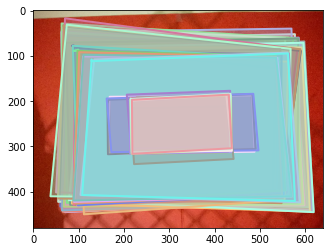

In [ ]:
import cv2

catIds = coco.getCatIds(catNms=['document'])
imgIds = coco.getImgIds(catIds=catIds)
for id in imgIds:
    img = coco.imgs[id]
    name = img['file_name']
    cat_ids = coco.getCatIds()
    anns_ids = coco.getAnnIds(imgIds=img['id'], catIds=cat_ids, iscrowd=None)
    anns = coco.loadAnns(anns_ids)
    image = np.array(Image.open(os.path.join(img_dir, name)))
    coco.showAnns(anns)
    mask = coco.annToMask(anns[0])
    for i in range(len(anns)):
        mask += coco.annToMask(anns[i])
    mask = ((mask - mask.min()) / (mask.max() - mask.min()) * 255).astype("uint8")
    cv2.imwrite(f"/content/drive/MyDrive/bigvision/Doc masks/{name}", mask)

In [ ]:
!unzip '/content/drive/Shareddrives/hackathon/Datasets.zip'

Archive:  /content/drive/Shareddrives/hackathon/Datasets.zip
   creating: Datasets/
  inflating: Datasets/.DS_Store      
  inflating: __MACOSX/Datasets/._.DS_Store  
   creating: Datasets/Wires/
   creating: Datasets/Rebar/
   creating: Datasets/Brick/
   creating: Datasets/PVC/
   creating: Datasets/Cementitious Debris/
  inflating: Datasets/Wires/Google_0067 (2).jpeg  
  inflating: __MACOSX/Datasets/Wires/._Google_0067 (2).jpeg  
  inflating: Datasets/Wires/Bing_0010.jpeg  
  inflating: __MACOSX/Datasets/Wires/._Bing_0010.jpeg  
  inflating: Datasets/Wires/Google_0040 (2).jpeg  
  inflating: __MACOSX/Datasets/Wires/._Google_0040 (2).jpeg  
  inflating: Datasets/Wires/55.png   
  inflating: __MACOSX/Datasets/Wires/._55.png  
  inflating: Datasets/Wires/Google_0018 (2).jpeg  
  inflating: __MACOSX/Datasets/Wires/._Google_0018 (2).jpeg  
  inflating: Datasets/Rebar/1653078050(1).jpg  
  inflating: __MACOSX/Datasets/Rebar/._1653078050(1).jpg  
  inflating: Datasets/Rebar/1653081655(1).j